## Model Implementation and validation Code:

### Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

## Performing Exploratory Analysis: 
It's important to explore the data and do basic analysis to understand the characteristic and form opinion / understanding of the data

### Data Structure:

In [ ]:
data.info()

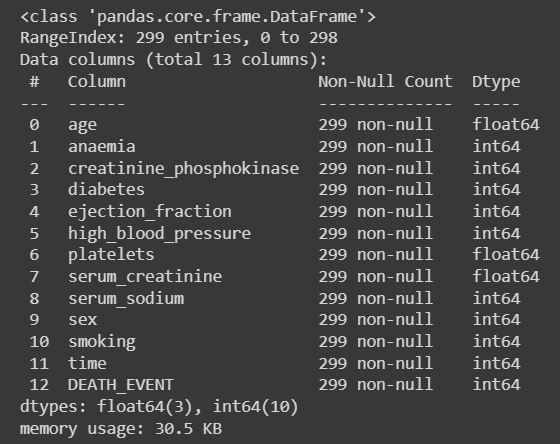</br>
There are no missing values.
### Correlation Matrix of the data

In [ ]:
#Examining a correlation matrix of all the features
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

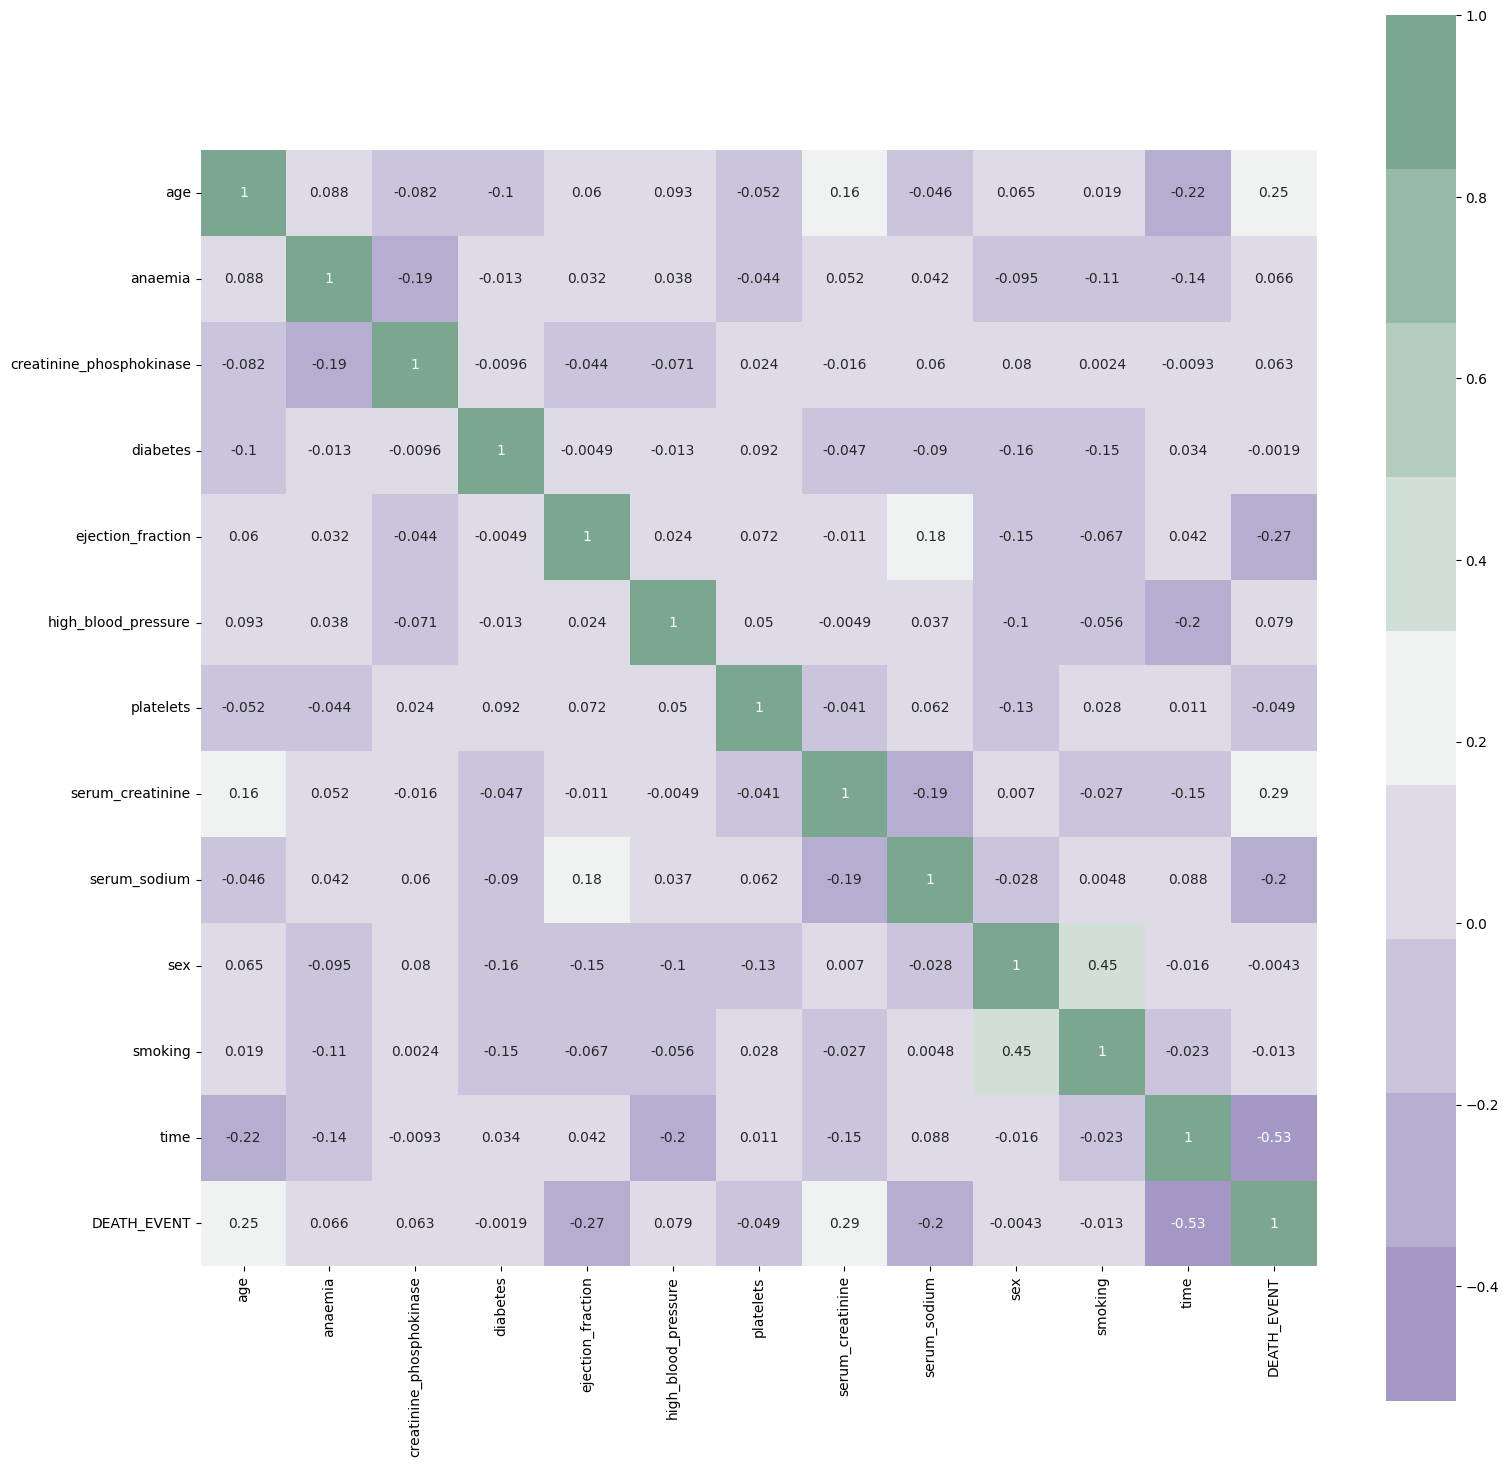
### Strong Positive Correlation

- Insight: Variables move in the same direction.

- Takeaway: Changes in one variable are likely to be associated with similar changes in the other.

### Strong Negative Correlation

- Insight: Variables move in opposite directions.

- Takeaway: Changes in one variable are likely to be associated with contrary changes in the other.

### Correlation Close to 1 or -1:


- Insight: Strong linear relationship.

- Takeaway: Changes in one variable can be predicted with a high degree of certainty based on the other.
### Notable points:
- Time of the patient's follow-up visit for the disease is crucial as initial diagnosis with cardiovascular issues and treatment reduces the chances of any fatality. It holds an inverse relation.
- Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
- Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with aging
- With this bar plot identify the highest and lowest values. Compare the magnitudes of different categories. Look for patterns or trends.
- We understand with this that mostly 50 to 70 years old people mostly prone to heart diseas.

In [ ]:
#Evaluating age distribution
plt.figure(figsize=(20,12))
#colors =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

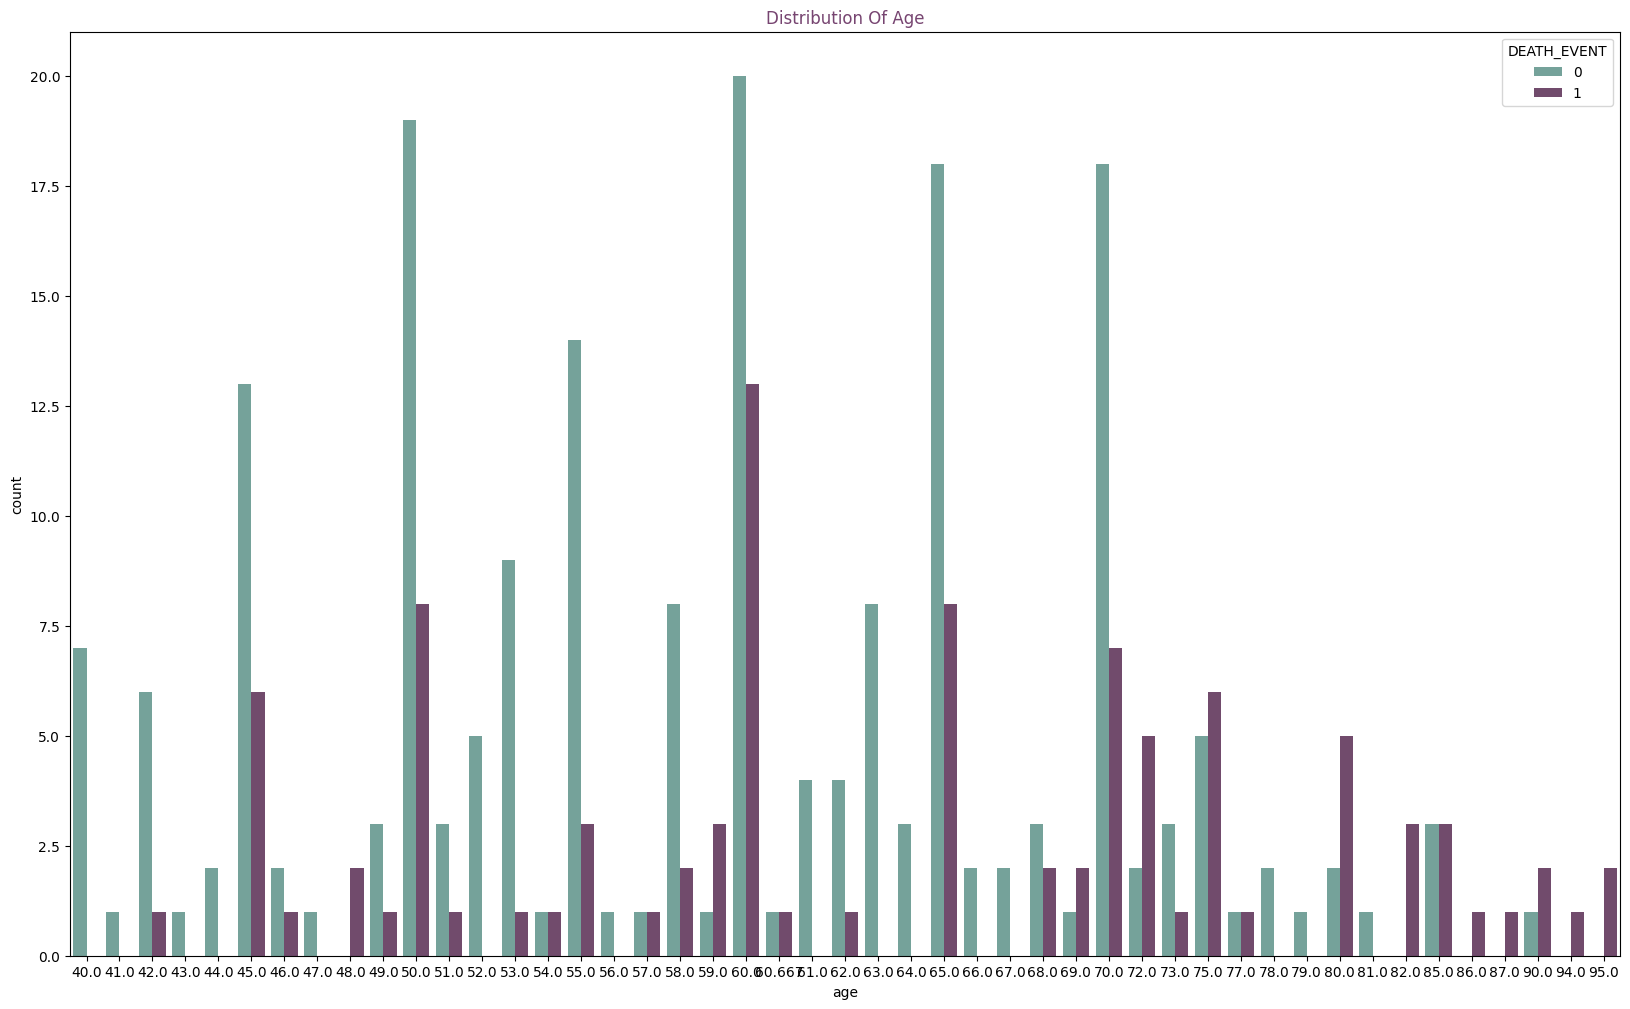</br>
### Outlier Analysis
Now we look for outliers using boxplot if any outlier found there should be remove that outlier.

In [ ]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
    plt.show()

: 

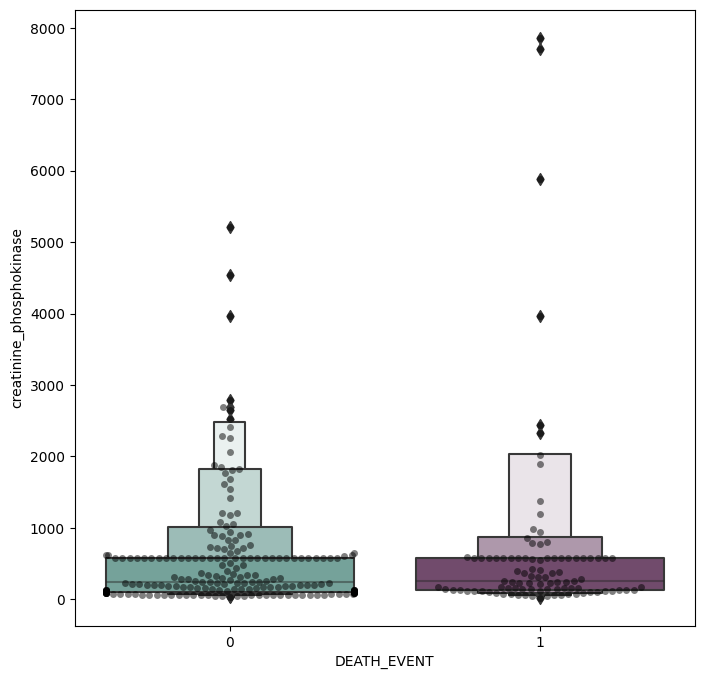 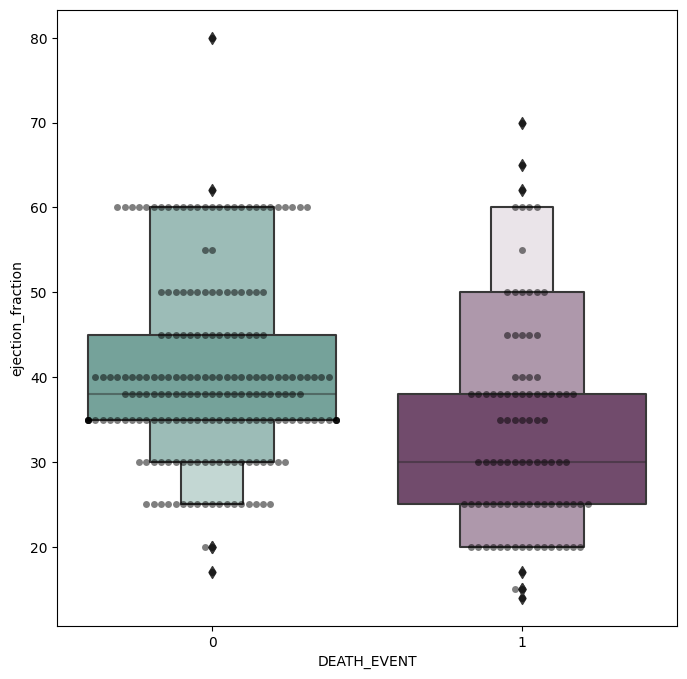 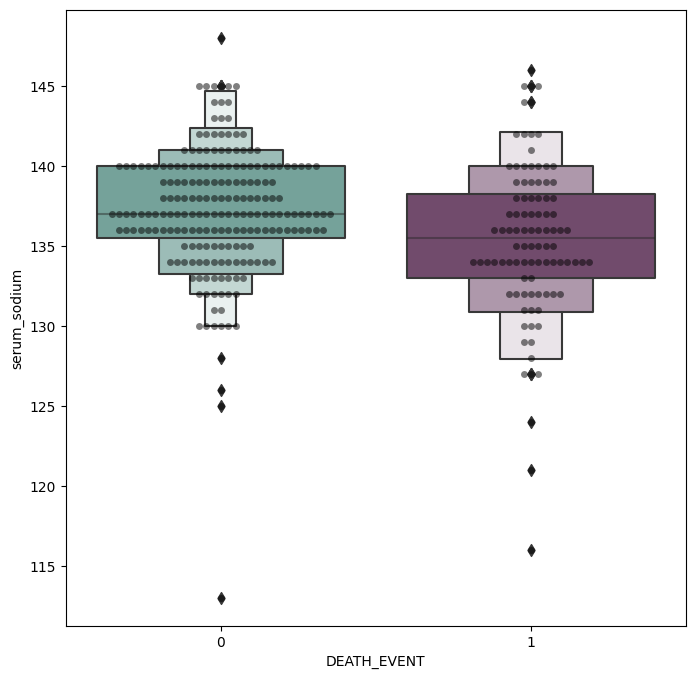 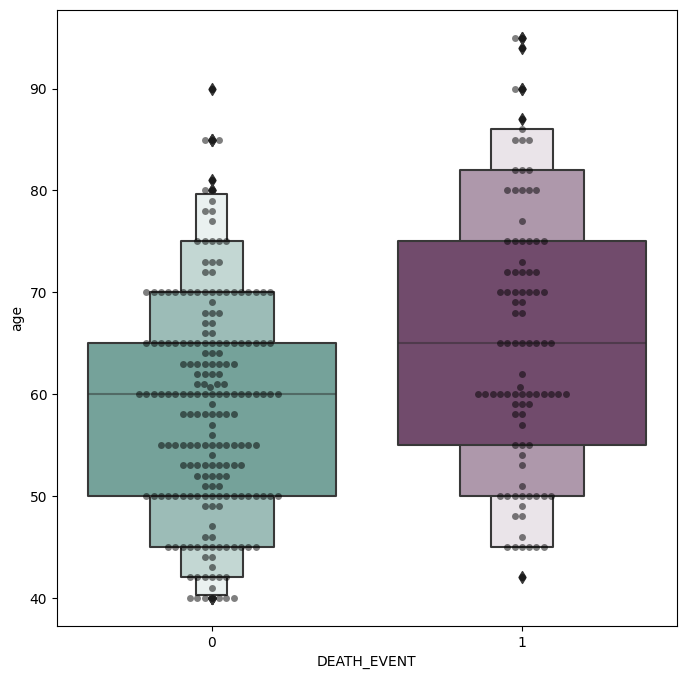</br>
<b>Outliers: Individual points beyond the interquartile range can be identified as outliers.</b>

In [ ]:
sns.kdeplot(x=data["age"], y=None, hue =data["DEATH_EVENT"], palette=cols)

: 

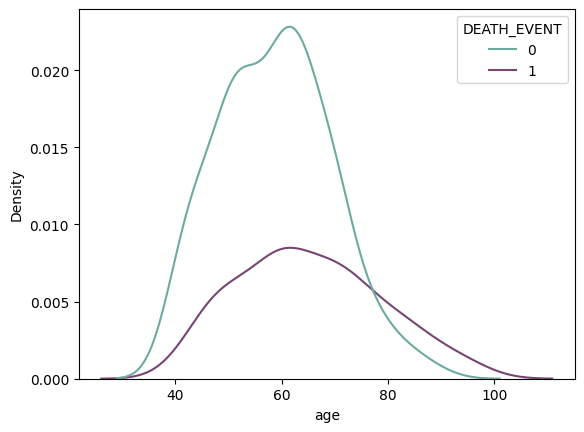</br>
- This KDE plot visualizes the distribution of death events, highlighting the age at which the majority of fatalities occurred or death happens. 

## Data processing 
- Assigning values to features as X and target as y
- Perform the scaling of the features
- Split test and training sets

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)  
X_df.describe().T

# Now splitting in train and test data
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)


# Initializing the ANN model 
model = Sequential()


# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])


# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500, validation_split=0.2)


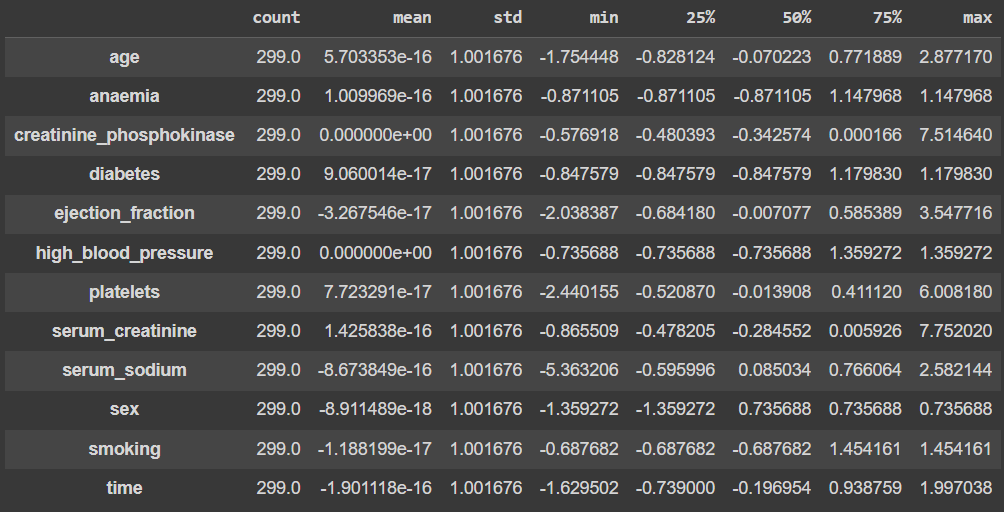</br>
### For this binary classification model
- We used four hidden layers, with Uniform distribution or Gaussian distribution kernels initializer
- First three layers we have used activation function is ReLU 
- Last hidden we used sigmoid with the adam optimization and mean_squared_error loss  function 
### Validation vs Training accuracy

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Validation Accuracy 
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


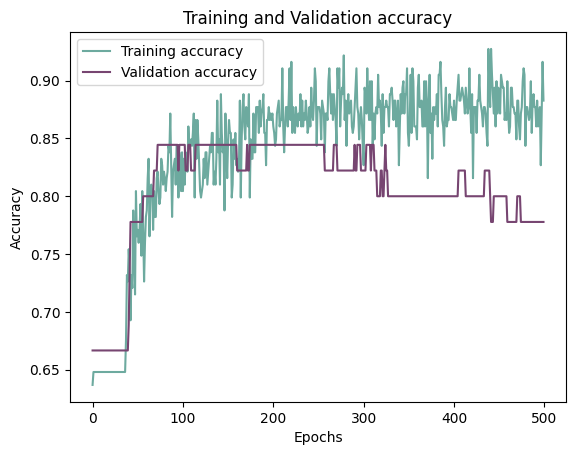</br>
### Run prediction with Test Data

In [ ]:

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()


# Confusion Matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

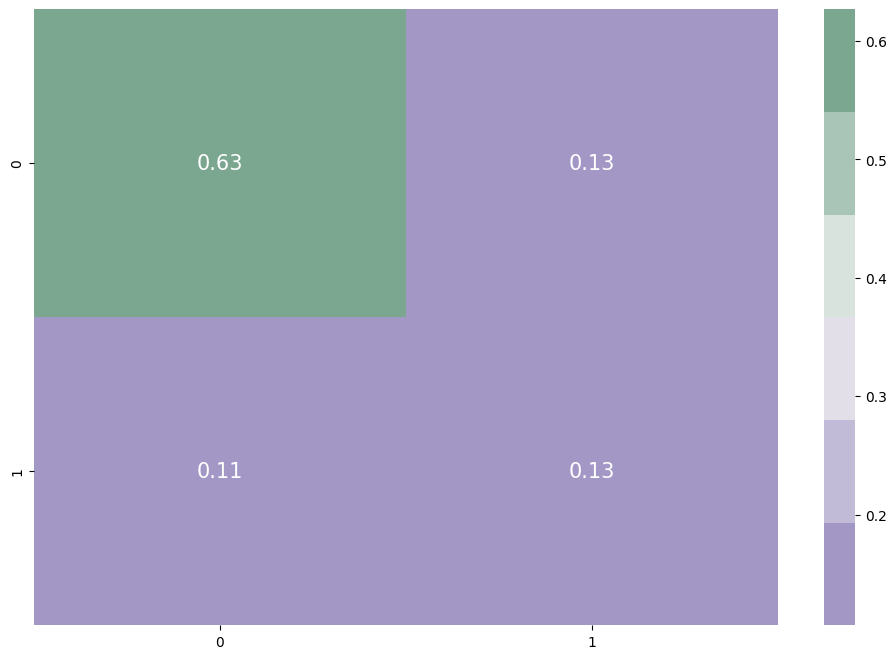</br>
### Classification Report 
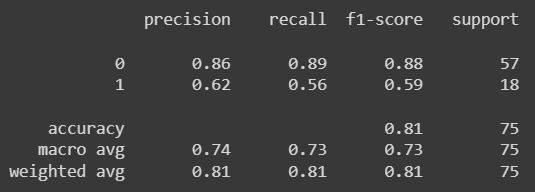</br>